In [4]:
import pandas as pd
import  numpy as np
from scipy.stats  import ttest_1samp,wilcoxon
from statsmodels.stats.power import ttest_power

In [27]:
#  one sample  ttest
x=np.random.randint(0,100,size=10)
t_test,pval=ttest_1samp(x,50)
t_test,pval

(1.0583990041555131, 0.31745236146056705)

In [24]:
test,pval=wilcoxon(x-100)
test,pval

(0.0, 0.001953125)

In [23]:
x.mean()

51.7

In [25]:
i=(np.mean(x)-50)/(np.std(x))
i

0.057601971878803615

In [26]:
ttest_power(i,nobs=10,alpha=0.05,alternative="two-sided")

0.0530722503111887

In [28]:
#  two independent sample  test ttest

In [29]:
from scipy.stats import ttest_1samp,ttest_ind
from statsmodels.stats.power import ttest_power

In [30]:
x=np.random.randint(0,100,size=10)
y=np.random.randint(0,100,size=10)

In [31]:
x,y

(array([44, 27, 97, 41, 27, 87, 46,  6, 48, 40]),
 array([69, 44,  4, 86,  4, 94, 30, 86, 86, 89]))

In [32]:
ttest,pvals=ttest_ind(x,y)
ttest,pvals

(-0.9071494684034068, 0.3763125129678273)

In [33]:
energ = np.array([
# energy expenditure in mJ and stature (0=obese, 1=lean)
[9.21, 0],
[7.53, 1],
[7.48, 1],
[8.08, 1],
[8.09, 1],
[10.15, 1],
[8.40, 1],
[10.88, 1],
[6.13, 1],
[7.90, 1],
[11.51, 0],
[12.79, 0],
[7.05, 1],
[11.85, 0],
[9.97, 0],
[7.48, 1],
[8.79, 0],
[9.69, 0],
[9.68, 0],
[7.58, 1],
[9.19, 0],
[8.11, 1]])

In [43]:
# for lean 
a= energ[:,1]==1
x=energ[a][:,0]

In [45]:
# obese
a= energ[:,1]==0
y=energ[a][:,0]

In [48]:
ttest,pval=ttest_ind(x,y)

In [49]:
ttest,pval

(-3.9455649161549835, 0.0007989982111700593)

In [50]:
# paired samples

In [51]:
intake = np.array([
[5260, 3910],
[5470, 4220],
[5640, 3885],
[6180, 5160],
[6390, 5645],
[6515, 4680],
[6805, 5265],
[7515, 5975],
[7515, 6790],
[8230, 6900],
[8770, 7335],
])

In [55]:
x=intake[:,0]
y=intake[:,1]

In [57]:
test,pval=ttest_1samp(x-y,0)
test,pval

(11.941392877647603, 3.059020942934875e-07)

In [58]:
ttest,pval=ttest_ind(x,y)

In [59]:
ttest,pval

(2.6242022946075902, 0.01625219443111871)

In [60]:
i=x-y

In [63]:
s=(np.mean(i)-1000)/(np.std(i))
s

0.916427192751689

In [64]:
ttest_power(s,nobs=10,alpha=0.05,alternative="two-sided")

0.7324501987167191

In [65]:
# test for proportions 

In [66]:
x=pd.read_csv("insurance.csv")

In [67]:
x.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# Test of proportions
'sex' and 'smoker' are two categorical variables
We want to see if the proportion of smokers in the female population is significantly less than it is in the male population
Ho = The proportions are equal
Ha = The two proportions are not equal

In [73]:
male= x[x["sex"]=="male"]["smoker"].value_counts()[1]
female= x[x["sex"]=="female"]["smoker"].value_counts()[1]

In [79]:
nm=x["sex"].value_counts()[0]
nf=x["sex"].value_counts()[1]

In [86]:
from statsmodels.stats.proportion import proportions_ztest

In [87]:
test,pval=proportions_ztest([male,female],[nm,nf])

In [88]:
test,pval

(2.7867402154855503, 0.005324114164320532)

In [89]:
if pval<0.05:
    print("reject the null  hypothesis")
else:
    print('reject the null hypothesis')

reject the null  hypothesis


In [90]:
# test of variance 

In [91]:
age19=x[ x["age"]==19]

In [93]:
age19.sex.value_counts()

male      35
female    33
Name: sex, dtype: int64

In [98]:
male=age19[age19["sex"]=="male"]["bmi"].iloc[:-2]
female=age19[age19["sex"]=="female"]["bmi"]


In [100]:
v1,v2=np.var(male),np.var(female)

In [101]:
v1,v2

(35.05058650137741, 30.765708585858583)

In [110]:
c=age19.sex.value_counts()[0]
c

35

In [111]:
df=c-1

In [112]:
chi=(v1*df)/v2

In [113]:
chi

38.73533215466406

In [114]:
# chi_critical chi table df,ci 
chi_critical = 46.19

In [116]:
if chi<chi_critical:
    print("fail to reject")
else:
    print("reject the hypothesis ")

fail to reject


# ANOVA and Chi Square

National Transportation Safety Board (NTSB) examines the safety of compact cars, midsize cars and full-size cars.
Using the fake data given below, test whether the mean pressure applied to the driver's head during a crash test is equal for each types of car at 5% level of significance.

In [117]:
compact_car = [643, 655,702]
midsize_car = [469, 427, 525]
fullsize_car = [484, 456, 402]

In [120]:
x=pd.DataFrame({"Type":"compact_cars","pressure":compact_car})
y=pd.DataFrame({"Type":"midsize_car","pressure":midsize_car})
z=pd.DataFrame({"Type":"fullsize_car","pressure":fullsize_car})

In [122]:
data=pd.DataFrame()

In [123]:
data=data.append(x)
data=data.append(y)
data=data.append(z)

In [127]:
data

,Type,pressure
0,compact_cars,643
1,compact_cars,655
2,compact_cars,702
0,midsize_car,469
1,midsize_car,427
2,midsize_car,525
0,fullsize_car,484
1,fullsize_car,456
2,fullsize_car,402


<AxesSubplot:xlabel='Type', ylabel='pressure'>

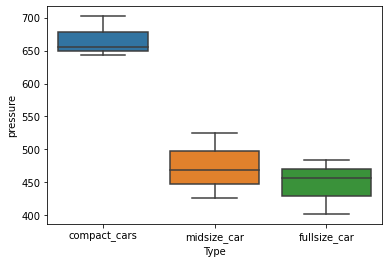

In [130]:
import seaborn as sns
sns.boxplot(x="Type",y="pressure",data=data)

In [131]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [134]:
model=ols("pressure~Type",data=data).fit()
table=sm.stats.anova_lm(model,type=2)
table

,df,sum_sq,mean_sq,F,PR(>F)
Type,2.0,86049.555556,43024.777778,25.175411,0.001207
Residual,6.0,10254.000000,1709.000000,NaN,NaN


In [135]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [137]:
print(pairwise_tukeyhsd(data["pressure"],data["Type"]))

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1       group2     meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------
compact_cars fullsize_car -219.3333 0.0015 -322.7791 -115.8876   True
compact_cars  midsize_car    -193.0  0.003 -296.4458  -89.5542   True
fullsize_car  midsize_car   26.3333 0.7172  -77.1124  129.7791  False
---------------------------------------------------------------------


In [138]:
table1  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,79, 81, 74, 77, 66],
           [2, 78, 86, 89, 97, 86], [3, 81, 87, 84, 94, 82], [4, 80, 83, 81, 88, 83], [5, 70, 74, 77, 89, 68]]


In [140]:
header=table1.pop(0)

In [142]:
header

['Day', 'Store-A', 'Store-B', 'Store-C', 'Store-D', 'Store-E']

In [149]:
x=pd.DataFrame(table1, columns=header)
x

,Day,Store-A,Store-B,Store-C,Store-D,Store-E
0,1,79,81,74,77,66
1,2,78,86,89,97,86
2,3,81,87,84,94,82
3,4,80,83,81,88,83
4,5,70,74,77,89,68


In [147]:
days=x["Day"].values
A=x["Store-A"].values
B=x["Store-B"].values
C=x["Store-C"].values
D=x["Store-D"].values
E=x["Store-E"].values

In [154]:
df1=pd.DataFrame({"Day":days,"Store":"A","Qos":A})
df2=pd.DataFrame({"Day":days,"Store":"B","Qos":B})
df3=pd.DataFrame({"Day":days,"Store":"C","Qos":C})
df4=pd.DataFrame({"Day":days,"Store":"D","Qos":D})
df5=pd.DataFrame({"Day":days,"Store":"E","Qos":E})

In [157]:
df=pd.DataFrame()

In [158]:
df=df.append(df1)
df=df.append(df2)
df=df.append(df3)
df=df.append(df4)
df=df.append(df5)


In [159]:
df

,Day,Store,Qos
0,1,A,79
1,2,A,78
2,3,A,81
3,4,A,80
4,5,A,70
0,1,B,81
1,2,B,86
2,3,B,87
3,4,B,83
4,5,B,74


<AxesSubplot:xlabel='Store', ylabel='Qos'>

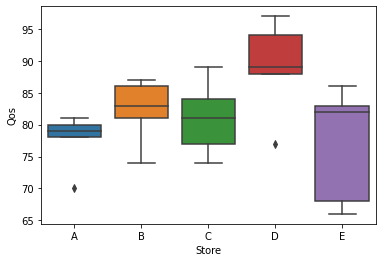

In [160]:
sns.boxplot(x="Store",y="Qos",data=df)

In [162]:
import statsmodels.api  as sm
from statsmodels.formula.api import ols

In [166]:
formula="Qos~(Day)+(Store)"
model=ols(formula,df).fit()
anova=sm.stats.anova_lm(model,type=2)

In [167]:
anova

,df,sum_sq,mean_sq,F,PR(>F)
Store,4.0,461.76,115.440000,2.456775,0.080773
Day,1.0,7.22,7.220000,0.153655,0.699429
Residual,19.0,892.78,46.988421,NaN,NaN


# Chi Square
A chi-square distribution with k degrees of freedom is given by sum of squares of standard normal random variables 𝑍1, 𝑍2, ... 𝑍𝑘 obtained by transforming normal standard variables 𝑋1, 𝑋2, ... 𝑋𝑘 with mean values 𝜇1, 𝜇2, ... 𝜇𝑘 and corresponding standard deviation 𝜎1, 𝜎2, ... 𝜎𝑘
𝜒𝑘2 = 𝑍12 + 𝑍22 + … + 𝑍𝑘2

The probability density function of f(x) =

𝑥𝑘2−1𝑒−𝑥22𝑘2Γ(𝑘2) if x > 0 else 0

where Γ(k/2) is a gamma function given by

Γ𝑘2 = ∫0∞𝑥𝑘−1𝑒−𝑥𝑑𝑥
Properties of Chi Square distribution
1. The mean and standard deviation of a chi-square distribution are k and √2k respectively, where k is the degrees of freedom.
2. As the degrees of freedom increases, the probability density function of a chi-square distribution approaches normal distribution.
3. Chi-square goodness of fit is one of the popular tests for checking whether a data follows a specific probability distribution.
4. Chi square test is a right tailed test.
Chi-square Goodness of fit tests
Goodness of fit tests are hypothesis tests that are used for comparing the observed distribution pf data with expected distribution of the data to decide whether there is any statistically significant difference between the observed distribution and a theoretical distribution (for example, normal, exponential, etc.) based on the comparison of observed frequencies in the data and the expected frequencies if the data follows a specified theoretical distribution.

Hypothesis	Description
Null hypothesis	There is no statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution
Alternative hypothesis	There is statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution
Chi-square Goodness of fit tests
Chi-square statistic for goodness of fit is given by

𝜒2 = ∑𝑛𝑖=1∑𝑚𝑗=1(𝑂𝑖𝑗−𝐸𝑖𝑗)2𝐸𝑖𝑗
This test is invalid when the observed or expected frequencies in each category are too small. A typical rule is that all of the observed and expected frequencies should be at least 5.

Example 5
A1 airlines operated daily flights to several Indian cities. The operations manager believes that 30% of their passengers prefer vegan food, 45% prefer vegetarian food , 20% prefer non-veg food 5% request for Jain food.

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

Food type	Vegan	Vegetarian	Non-Vegetarian	Jain
Number of passengers		190	185	90	35
At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

Step 1: State the null and alternative hypothesis:
Null hypothesis: 𝐻0: Meal preference is as per the perceived ratios of the operations manager

Alternative hypothesis: 𝐻𝐴: Meal preference is different from the perceived ratios of the operations manager

In [170]:
import scipy.stats as stats
import scipy

In [176]:
observed=scipy.array(np.random.randint(0,100,size=3))

<ipython-input-176-e8c16daca8d9>:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  observed=scipy.array(np.random.randint(0,100,size=3))


In [180]:
observed

array([44, 37, 62])

In [181]:
n=observed.sum()

In [184]:
expected=scipy.array ([n*0.30,n*0.50,n*0.05])

<ipython-input-184-0ab44ff623d5>:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  expected=scipy.array ([n*0.30,n*0.50,n*0.05])


In [186]:
chi,pval=stats.chisquare(observed,expected)

In [187]:
chi,pval

(437.4474358974359, 1.0221066961705469e-95)

# Chi-square tests of independence

Chi-square test of independence is a hypothesis test in which we test whether two or more groups are statistically independent or not.

In [194]:
import scipy.stats as stats

x= np.array([[138, 83, 64],[64, 67, 84]])


chi_sq_Stat, p_value, deg_freedom=stats.chi2_contingency(x)

print(chi_sq_Stat, p_value, deg_freedom)

ValueError: too many values to unpack (expected 3)